# Libraries

In [206]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import cv2
import face_recognition
import matplotlib.patches as patches

from PIL import Image
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
from matplotlib.pyplot import imshow
from IPython.display import clear_output


from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.utils import to_categorical
from keras.models import load_model

# Functions

In [207]:
def find_driver_face(frame) :  
    width  = []
    top_li    = []
    right_li  = []
    bottom_li = []
    left_li   = []

    #image = face_recognition.load_image_file(image_loc)
    #face_locations = face_recognition.face_locations(image)

    image = frame
    face_locations = face_recognition.face_locations(frame)

    for face_location in face_locations:
        # Print the location of each face in this image
        top, right, bottom, left = face_location
        top_li.append(top)
        right_li.append(right)
        bottom_li.append(bottom)
        left_li.append(left)
        width.append((int(top)-int(bottom))*(int(left)-int(right)))  

    if len(width) > 0 :
        face_index = width.index(max(width))
        top = top_li[face_index]
        right = right_li[face_index]
        bottom = bottom_li[face_index]
        left = left_li[face_index]

    face_image = image[top:bottom, left:right]
    pil_image = Image.fromarray(face_image)
    return pil_image

def convert_driver_emotion(driver_face) :
    driver_face = driver_face.convert('L')
    
    pix = np.array(driver_face)
    
    pix = cv2.resize(pix, dsize=(48, 48))
    pix = pix.reshape(1,48, 48, 1)
    
    return pix

In [208]:
def result_driver_emotion(driver_image_array):

    pred_test_label = model.predict(driver_image_array)
    maxindex = pred_test_label.argmax()
    
    return emotions[maxindex]

In [209]:
def video_capture(video) :
    video_capture = cv2.VideoCapture(video)
    frame_count = 0

    while video_capture.isOpened():    
        # Grab a single frame of video
        ret, frame = video_capture.read()

        # Bail out when the video file ends
        if not ret:
            video_capture.release()
            break

        # We will search face in every 14 frames to speed up process.
        frame_count += 1
        if frame_count % 14 == 0:    
            frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                        
            # Display video frame
            plt.imshow(frame)  
            plt.axis('off')

            # Show frame...
            plt.show()

            # ... and hold it until a new frame appears
            clear_output(wait=True)
            
            pic.append(frame)

# data prepare

In [210]:
emotions = {0: 'Angry', 1: 'Disgust', 2: 'Fear', 3: 'Happy', 4: 'Sad', 5: 'Surprise', 6: 'Neutral'}

# load the model

In [211]:
model = load_model('facial-emotion_model.h5')

# Driver Analyse Results

In [202]:
driver_face = find_driver_face("two_people.jpg")
driver_face

TypeError: __call__(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.fhog_object_detector, image: array, upsample_num_times: int=0) -> _dlib_pybind11.rectangles

Invoked with: <_dlib_pybind11.fhog_object_detector object at 0x7fad27d02630>, 'two_people.jpg', 1

In [203]:
pix = convert_driver_emotion(driver_face)

In [204]:
result_driver_emotion(pix)

'Surprise'

In [205]:
driver_face = find_driver_face("two_people.jpg")
driver_face

TypeError: __call__(): incompatible function arguments. The following argument types are supported:
    1. (self: _dlib_pybind11.fhog_object_detector, image: array, upsample_num_times: int=0) -> _dlib_pybind11.rectangles

Invoked with: <_dlib_pybind11.fhog_object_detector object at 0x7fad27d02630>, 'two_people.jpg', 1

In [16]:
pix = convert_driver_emotion(driver_face)

In [17]:
result_driver_emotion(pix)

2

# Practice

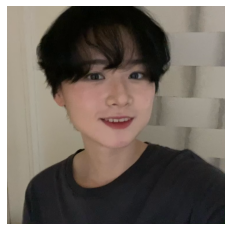

In [212]:
pic = []
video_capture('./data/facevedio.mp4')

In [213]:
driver_face_li = []
for i in range(len(pic)) :
    try :
        driver_face = find_driver_face(pic[i])
    except UnboundLocalError as e:
        pass
    else :
        driver_face_li.append(driver_face)

# Driver Analyse Results

In [217]:
for i in range(len(driver_face_li)) : 
    pix = convert_driver_emotion(driver_face_li[i])
    print(result_driver_emotion(pix))

Fear
Surprise
Neutral
Surprise
Surprise
Surprise
Surprise
Sad
Surprise


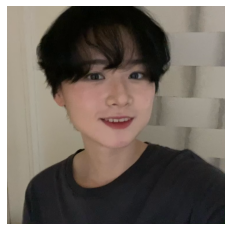

In [218]:
video_capture('./data/facevedio.mp4')